# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Import DataSet

In [2]:
df = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\7 Clustering\crime_data.csv")

# EDA

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.columns = ('CityName', 'Murder', 'Assault', 'UrbanPop', 'Rape')

In [5]:
df.head()

,CityName,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df1 = df.drop('CityName', axis=1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [8]:
df1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
df1.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
df1.sort_values(by='Murder', ascending=False).head(10)

,Murder,Assault,UrbanPop,Rape
9,17.4,211,60,25.8
23,16.1,259,44,17.1
8,15.4,335,80,31.9
17,15.4,249,66,22.2
39,14.4,279,48,22.5
0,13.2,236,58,21.2
41,13.2,188,59,26.9
32,13.0,337,45,16.1
42,12.7,201,80,25.5
27,12.2,252,81,46.0


In [11]:
df1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<AxesSubplot:>

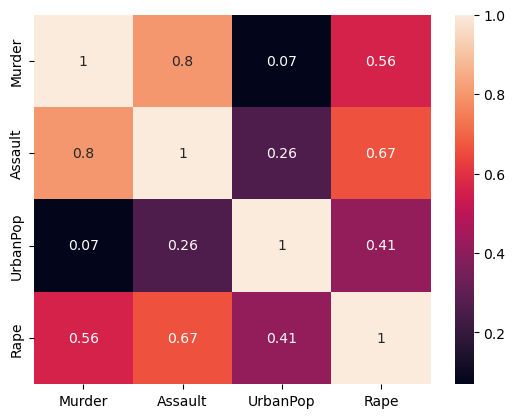

In [12]:
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:>

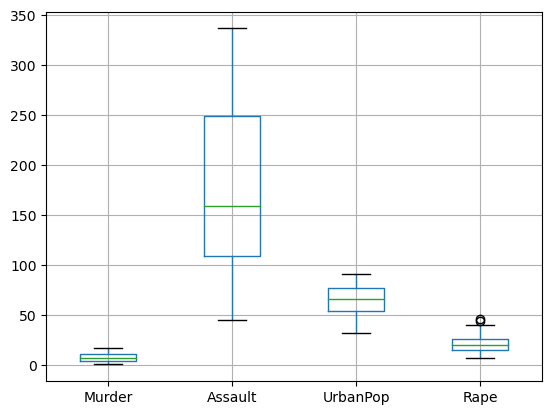

In [13]:
df1.boxplot()

# Feature Scaling

In [14]:
# Feature Scailing
sc = StandardScaler()
scal = sc.fit_transform(df1)
scal

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# KMeans Clustering

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


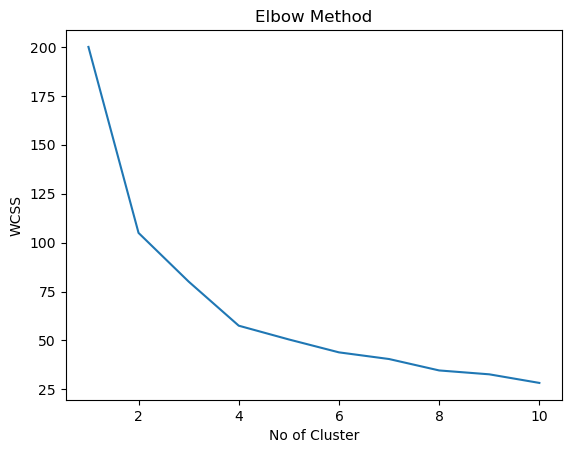

In [15]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scal)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('No of Cluster')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0)
y_hc = kmeans.fit_predict(scal)
y_hc

array([0, 4, 4, 3, 4, 4, 2, 3, 4, 0, 2, 1, 4, 3, 1, 3, 3, 0, 1, 4, 2, 4,
       3, 0, 4, 3, 3, 4, 1, 2, 4, 4, 0, 1, 3, 3, 3, 3, 2, 0, 1, 0, 4, 2,
       1, 3, 3, 1, 1, 3])

In [17]:
y = pd.DataFrame(y_hc)
y = y.value_counts()
y

3    15
4    13
1     9
0     7
2     6
dtype: int64

In [18]:
df['KMeans_Cluster'] = kmeans.labels_
df

,CityName,Murder,Assault,UrbanPop,Rape,KMeans_Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,0


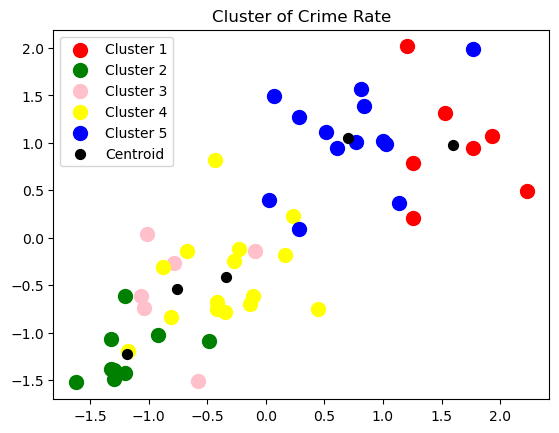

In [19]:
plt.scatter(scal[y_hc == 0,0], scal[y_hc == 0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(scal[y_hc == 1,0], scal[y_hc == 1,1], s=100, c='green', label= 'Cluster 2')
plt.scatter(scal[y_hc == 2,0], scal[y_hc == 2,1], s=100, c='pink', label= 'Cluster 3')
plt.scatter(scal[y_hc == 3,0], scal[y_hc == 3,1], s=100, c='yellow', label= 'Cluster 4')
plt.scatter(scal[y_hc == 4,0], scal[y_hc == 4,1], s=100, c='blue', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c= 'black', label= 'Centroid')
plt.title('Cluster of Crime Rate')
plt.legend()
plt.show()

In [20]:
sil = silhouette_score(scal , kmeans.labels_)
sil

0.30612803169146263

# Hierachical Clustering

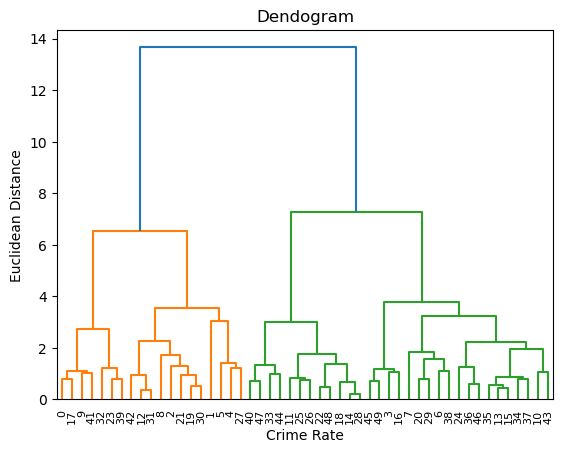

In [21]:
dendogram = sch.dendrogram(sch.linkage(scal,method='ward'))
plt.title('Dendogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean Distance')
plt.show()

In [22]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(scal)
y_hc

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [23]:
y = pd.DataFrame(y_hc)
y.value_counts()

0    19
1    12
2    12
3     7
dtype: int64

In [24]:
df['HC_Cluster'] = hc.labels_
df

,CityName,Murder,Assault,UrbanPop,Rape,KMeans_Cluster,HC_Cluster
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,4,1
2,Arizona,8.1,294,80,31.0,4,1
3,Arkansas,8.8,190,50,19.5,3,0
4,California,9.0,276,91,40.6,4,1
5,Colorado,7.9,204,78,38.7,4,1
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,3,0
8,Florida,15.4,335,80,31.9,4,1
9,Georgia,17.4,211,60,25.8,0,3


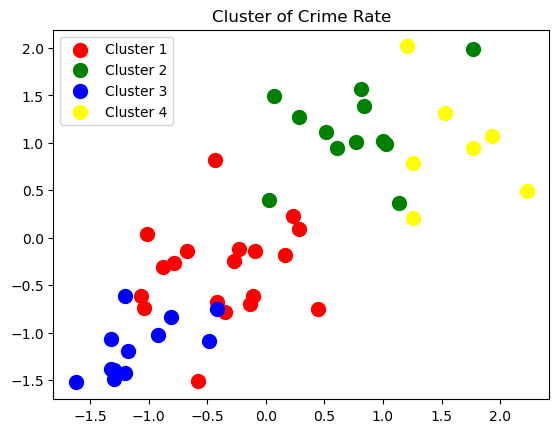

In [25]:
plt.scatter(scal[y_hc == 0,0], scal[y_hc == 0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(scal[y_hc == 1,0], scal[y_hc == 1,1], s=100, c='green', label= 'Cluster 2')
plt.scatter(scal[y_hc == 2,0], scal[y_hc == 2,1], s=100, c='blue', label= 'Cluster 3')
plt.scatter(scal[y_hc == 3,0], scal[y_hc == 3,1], s=100, c='yellow', label= 'Cluster 4')
plt.title('Cluster of Crime Rate')
plt.legend()
plt.show()

In [26]:
sil = silhouette_score(scal , hc.labels_)
sil

0.3370187183556962

# DBSCAN Clustering

In [27]:

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scal)
distances , indices = nbrs.kneighbors(scal)

In [28]:
distances

array([[0.        , 0.78006247],
       [0.        , 2.07898369],
       [0.        , 1.0482199 ],
       [0.        , 1.0013278 ],
       [0.        , 1.20897691],
       [0.        , 1.24886253],
       [0.        , 0.88100359],
       [0.        , 1.19227586],
       [0.        , 1.30974334],
       [0.        , 0.86797806],
       [0.        , 1.08184506],
       [0.        , 0.75913104],
       [0.        , 0.35377437],
       [0.        , 0.43312429],
       [0.        , 0.2079438 ],
       [0.        , 0.43312429],
       [0.        , 0.8610239 ],
       [0.        , 0.78006247],
       [0.        , 0.50466926],
       [0.        , 0.54082482],
       [0.        , 0.80586349],
       [0.        , 0.58411812],
       [0.        , 0.49909939],
       [0.        , 0.79455301],
       [0.        , 0.98866758],
       [0.        , 0.74649625],
       [0.        , 0.53326883],
       [0.        , 1.20897691],
       [0.        , 0.2079438 ],
       [0.        , 0.80586349],
       [0.

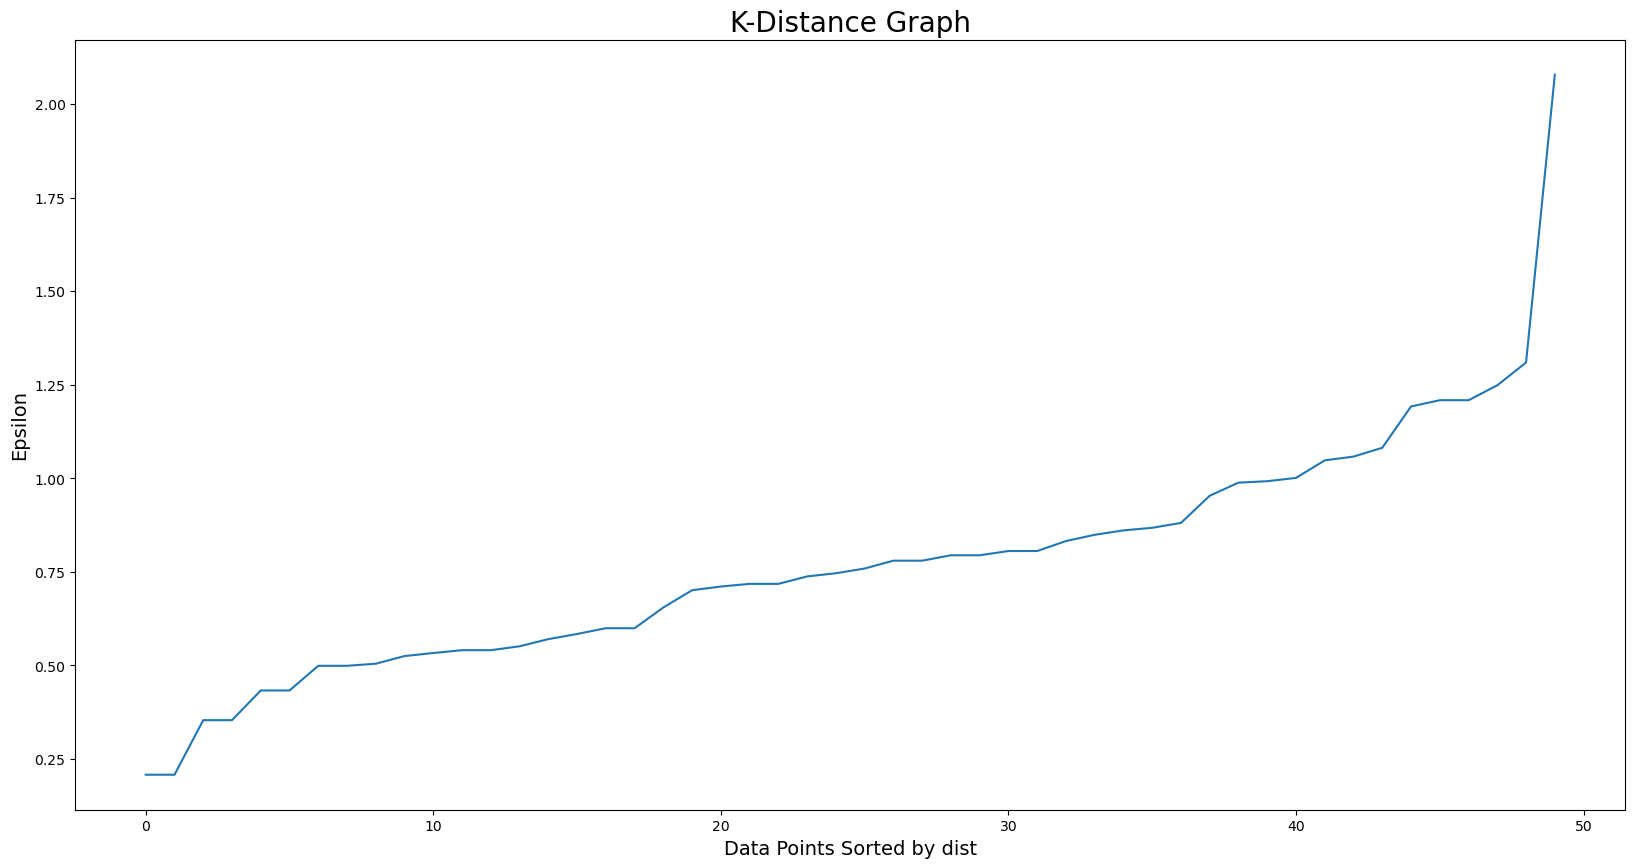

In [29]:
# Plotting K Distances Graph
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-Distance Graph',fontsize=20)
plt.xlabel('Data Points Sorted by dist',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [30]:
dbscan = DBSCAN(eps=1.25)
y_hc = dbscan.fit_predict(scal)
y_hc

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [31]:
y = pd.DataFrame(y_hc)
y.value_counts()

 2    32
 1     7
-1     6
 0     5
dtype: int64

In [32]:
df['DB_Cluster']=dbscan.labels_
df

,CityName,Murder,Assault,UrbanPop,Rape,KMeans_Cluster,HC_Cluster,DB_Cluster
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,4,1,-1
2,Arizona,8.1,294,80,31.0,4,1,1
3,Arkansas,8.8,190,50,19.5,3,0,2
4,California,9.0,276,91,40.6,4,1,-1
5,Colorado,7.9,204,78,38.7,4,1,1
6,Connecticut,3.3,110,77,11.1,2,0,2
7,Delaware,5.9,238,72,15.8,3,0,2
8,Florida,15.4,335,80,31.9,4,1,-1
9,Georgia,17.4,211,60,25.8,0,3,0


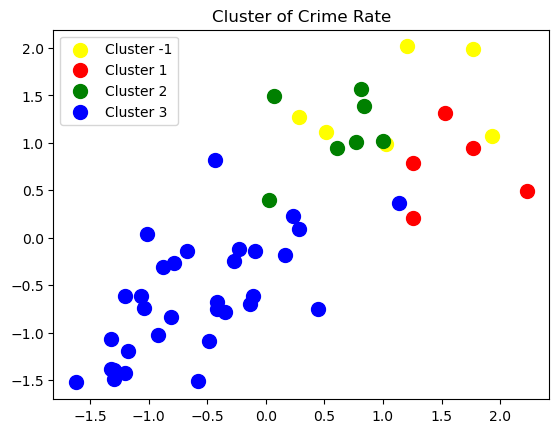

In [33]:
plt.scatter(scal[y_hc == -1,0], scal[y_hc == -1,1], s=100, c='yellow', label= 'Cluster -1')
plt.scatter(scal[y_hc == 0,0], scal[y_hc == 0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(scal[y_hc == 1,0], scal[y_hc == 1,1], s=100, c='green', label= 'Cluster 2')
plt.scatter(scal[y_hc == 2,0], scal[y_hc == 2,1], s=100, c='blue', label= 'Cluster 3')
plt.title('Cluster of Crime Rate')
plt.legend()
plt.show()

In [34]:
sil = silhouette_score(scal , dbscan.labels_)
sil

0.23869670053300915